https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

- datetime: 대여 기록의 날짜와 시간 정보
- season: 계절 (1=봄, 2=여름, 3=가을, 4=겨울)
- holiday: 공휴일 여부 (0: 공휴일 아님, 1: 공휴일)
- workingday: 근무일 여부 (0: 주말 또는 공휴일, 1: 근무일)
- weather: 기상상황 (1~4)
- temp: 실제 온도
- atemp: 체감온도
- humidity: 습도
- windspeed: 풍속
- casual, registered: 비회원, 회원 대여량(train 데이터에만 있음)
- count: 총 대여량(타겟, train 데이터에만 있음)

In [1]:
# LinearRegression,RandomForestRegressor
# GradientBoostingRegressor, XGBRegressor, LGBMRegressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# matplotlib 한글 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# 1. 데이터 불러오기

In [19]:
# 데이터 로드
df = pd.read_csv("../data/bike-sharing-demand/train.csv")
test_df = pd.read_csv("../data/bike-sharing-demand/test.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


# 2. 데이터 전처리

## 2.1 datetime 변수 처리

In [7]:
# 1. datetime 변환
df['datetime'] = pd.to_datetime(df['datetime'])
# 연(year), 월(month), 일(day), 시간(hour), 요일(weekday) 정보 추출
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.dayofweek # 월요일: 0, 일요일: 6

In [20]:
# 1. datetime 변환
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
# 연(year), 월(month), 일(day), 시간(hour), 요일(weekday) 정보 추출
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekday'] = test_df['datetime'].dt.dayofweek # 월요일: 0, 일요일: 6

## 2.2 불필요한 컬럼 제거

In [8]:
df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.984948
atemp,0.984948,1.000000


temp와 atemp 상관계수 0.9840로 높음 -> 동일한 정보를 담고 있다.

In [9]:
df = df.drop(['datetime', 'casual', 'registered','day', 'atemp'], axis=1)

In [22]:
test_df = test_df.drop(['datetime','day', 'atemp'], axis=1)

In [23]:
test_df

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour,weekday
0,1,0,1,1,10.66,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,56,11.0014,2011,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,12,19,0
6489,1,0,1,2,10.66,60,11.0014,2012,12,20,0
6490,1,0,1,1,10.66,60,11.0014,2012,12,21,0
6491,1,0,1,1,10.66,56,8.9981,2012,12,22,0


In [10]:
categorical_features = ['season', 'weather']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [24]:
categorical_features = ['season', 'weather']
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

In [11]:
df.isnull().sum()

holiday       0
workingday    0
temp          0
humidity      0
windspeed     0
count         0
year          0
month         0
hour          0
weekday       0
season_2      0
season_3      0
season_4      0
weather_2     0
weather_3     0
weather_4     0
dtype: int64

# 3. 데이터 탐색 및 시각화

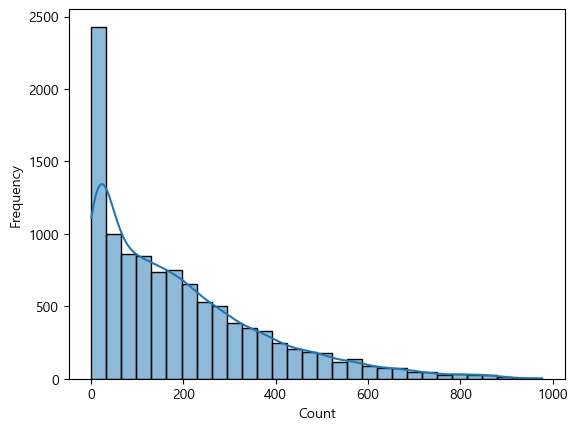

In [12]:
# 3.1 타겟 변수(count)의 분포 확인
sns.histplot(df['count'], bins=30, kde=True)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

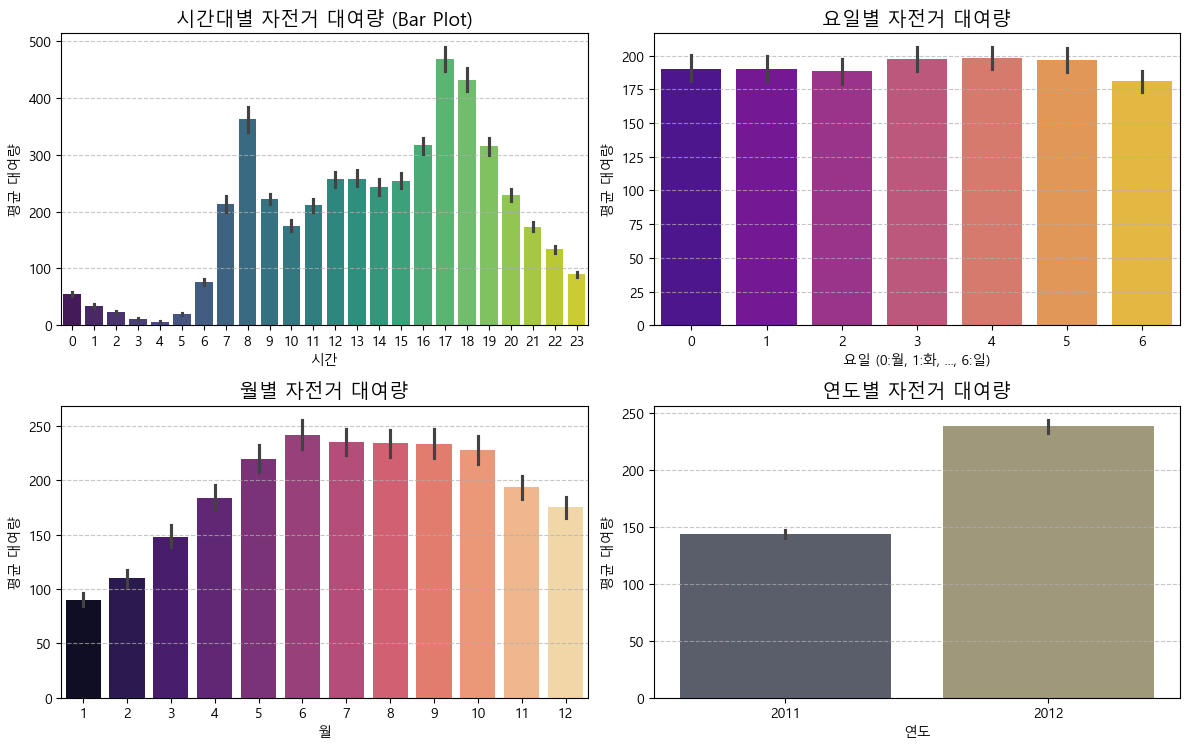

In [13]:
# 3.2 시간대(hour)별 평균 대여 수요 분석
# 시간(hour)별 자전거 대여량
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 1-1. 시간(hour)별 자전거 대여량
sns.barplot(x='hour', y='count', data=df, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('시간대별 자전거 대여량 (Bar Plot)', fontsize=14)
axes[0,0].set_xlabel('시간')
axes[0,0].set_ylabel('평균 대여량')
axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)

# 1-2. 요일(weekday)별 자전거 대여량
# 0:월요일, 6:일요일
sns.barplot(x='weekday', y='count', data=df, ax=axes[0,1], palette='plasma')
axes[0,1].set_title('요일별 자전거 대여량', fontsize=14)
axes[0,1].set_xlabel('요일 (0:월, 1:화, ..., 6:일)')
axes[0,1].set_ylabel('평균 대여량')
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)

# 1-3. 월(month)별 자전거 대여량
sns.barplot(x='month', y='count', data=df, ax=axes[1,0], palette='magma')
axes[1,0].set_title('월별 자전거 대여량', fontsize=14)
axes[1,0].set_xlabel('월')
axes[1,0].set_ylabel('평균 대여량')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# 1-4. 연도(year)별 자전거 대여량
# 2011년과 2012년 데이터를 비교
sns.barplot(x='year', y='count', data=df, ax=axes[1,1], palette='cividis')
axes[1,1].set_title('연도별 자전거 대여량', fontsize=14)
axes[1,1].set_xlabel('연도')
axes[1,1].set_ylabel('평균 대여량')
axes[1,1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) 
plt.show()

- 자전거 대여량이 주로 출퇴근 시간에 집중적인 수요가 발생하며, 낮 시간대에도 꾸준히 사용됨을 알 수 있습니다.
- 주중과 주말 모두 자전거 대여 수요가 강하다는 것을 알 수 있습니다. 
- 자전거 대여량은 강한 계절성을 보인다. 겨울철에는 수요가 감소한다.
- 2011년에 비해 2012년에 자전거 대여량이 늘었다.

# 4. 모델 학습 및 평가

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 분리
X = df.drop(['count'], axis=1)
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

In [25]:
results = {}

# 모델 반복 학습 및 평가
for name, model in models.items():
    # 모델 학습
    model.fit(X_train.values, y_train)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 성능 계산: RMSE와 R²
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # 결과 저장
    results[name] = {"RMSE": rmse, "R²": r2}
    
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

Linear Regression - RMSE: 140.6808, R²: 0.4004
Random Forest - RMSE: 39.8305, R²: 0.9519
Gradient Boosting - RMSE: 66.3239, R²: 0.8667
XGBoost - RMSE: 37.1867, R²: 0.9581
LightGBM - RMSE: 38.2788, R²: 0.9556


- lenear regression: 다른 모델들에 비해 성능이 가장 낮음 (복잡한 패턴 포착 불가)
- XGBoost, LightGBM: 유사한 RMSE와 R2

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. 하이퍼파라미터 후보 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. 모델 정의
rf = RandomForestRegressor(random_state=42)

# 3. GridSearchCV 정의
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=2)

# 4. 학습
grid_search.fit(X_train, y_train)

# 5. 결과 확인
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on validation set:", grid_search.best_score_)

# 6. 테스트셋에 대한 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R2: {r2:.3f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score on validation set: 0.9442750542303713
Test MSE: 1581.917
Test R2: 0.952


In [26]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# 1. 변환 (NumPy 2.0 호환 안정 처리)
X_np = X.to_numpy(dtype=np.float32)
y_np = df['count'].astype(np.float32).to_numpy()
X_test_np = df.to_numpy(dtype=np.float32)

# 2. 모델 정의
model = XGBRegressor(random_state=42)

# 3. 학습
model.fit(X_np, y_np)

# 4. 예측
preds = model.predict(X_test_np)
preds = [max(0, round(p)) for p in preds]

# 5. 제출
submission = pd.read_csv('../data/bike-sharing-demand/sampleSubmission.csv')
submission['count'] = preds
submission.to_csv('../data/bike-sharing-demand/submission_lgbm.csv', index=False)

print("제출 완료: submission_lgbm.csv")

ValueError: could not convert string to float: '2011-01-01 00:00:00'